In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn import linear_model

In [5]:
from sklearn.linear_model import Ridge

In [6]:
from mpl_toolkits.mplot3d import Axes3D

In [7]:
import tensorflow as tf

In [8]:
import matplotlib.pyplot as plt

In [9]:
np.random.seed(1234)

In [10]:
data1=pd.read_csv('ex2data1.csv')

In [11]:
data2=pd.read_csv('ex2data2.csv')

In [12]:
data3=pd.read_csv('ex2data3.csv',index_col=0)

In [13]:
def RMSE(Y, Y_hat, m):
    return float(np.sqrt(1 / m * np.dot((Y_hat - Y).T, (Y_hat - Y))))

In [14]:
def costFunction(X,W,Y):
    J=np.dot(X,W)
    J=np.subtract(J,Y)
    J=np.dot(J.transpose(),J)
    return J/len(Y)

In [15]:
def costFunctionWithL2Regulization(X,W,Y,lambd):
    J=np.dot(X,W)
    J=np.subtract(J,Y)
    J=np.dot(J.transpose(),J)
    L=lambd*np.dot(W.transpose(),W)
    J=J+L
    return J/len(Y)

In [16]:
def createNormalizedInputMatrix(inputData,order):
    X=np.ndarray(shape=(inputData.shape[0],order))
    for i in range(1,order+1):
        temp=np.power(inputData,i)
        X[:,i-1]=temp
    B=np.ones((inputData.shape[0],1))
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X=(X-mean)/std
    Xret=np.hstack((B,X))
    Xret=np.flip(Xret,1)
    return Xret,mean,std

In [17]:
def createWeightMatrix(order):
    W=np.ndarray(shape=(order+1,1))
    R=np.random.rand(order+1)
    W=R
    return W

In [18]:
def RootMeanSquareError(Y,Y_):
    SUM=0
    for i in range(0,len(Y)):
        SUM+=(Y[i]-Y_[i])**2
    return np.sqrt((SUM/len(Y)))

In [19]:
def GradientDescedent(Xmat,Wmat,Ymat,costValues11,tIter,lr):
    oldCost=costFunction(Xmat,Wmat,Ymat)
    iteration=0
    while(iteration < tIter):
        dJ=np.dot(np.dot(Xmat.transpose(),Xmat),Wmat)
        dJ1=np.dot(Xmat.transpose(),Ymat)
        Wmat=np.subtract(Wmat,2*lr*np.subtract(dJ,dJ1)/len(Ymat))
        newCost=costFunction(Xmat,Wmat,Ymat)
        costValues11[iteration]=newCost
        iteration=iteration+1
    return Wmat 

In [20]:
def GradientDescedentWithL2Regulization(Xmat,Wmat,Ymat,costValues11,tIter,lr,lambd):
    oldCost=costFunctionWithL2Regulization(Xmat,Wmat,Ymat,lambd)
    iteration=0
    while(iteration < tIter):
        dJ=np.dot(np.dot(Xmat.transpose(),Xmat),Wmat)
        dJ1=np.dot(Xmat.transpose(),Ymat)
        Wmat=np.subtract(Wmat,2*lr*np.add(np.subtract(dJ,dJ1),lambd*Wmat)/len(Ymat))
        newCost=costFunctionWithL2Regulization(Xmat,Wmat,Ymat,lambd)
        costValues11[iteration]=newCost
        iteration=iteration+1
    return Wmat 

In [21]:
def splitDataSet(X,train,test,Valid):
    np.random.seed(1)
    shuffled_indices=np.random.permutation(len(X))
    train_set_size=int(len(X)*train)
    test_set_size=int(len(X)*(train+test))
    train_indices=shuffled_indices[:train_set_size]
    test_indices=shuffled_indices[train_set_size:test_set_size]
    valid_indices=shuffled_indices[test_set_size:]
    return X.iloc[train_indices],X.iloc[test_indices],X.iloc[valid_indices]

In [22]:
def getNormalizedMatrixWithMeanandStd(Xin,mean,std,order):
    X=np.ndarray(shape=(Xin.shape[0],order))
    for i in range(1,order+1):
        temp=np.power(Xin,i)
        X[:,i-1]=temp
    B=np.ones((Xin.shape[0],1))
    X=(X-mean)/std
    Xret=np.hstack((B,X))
    Xret=np.flip(Xret,1)
    return Xret

In [ ]:
def Tf_Gradient_L2(X31n,X31valid,Y31train,Y31valid,lambd,alpha,train_epochs):
    m = np.float32(X31n[0].shape)
    Xtf33train = tf.constant(X31n, dtype = tf.float32, name = 'X_33train')
    Xtf33val = tf.constant(X31valid, dtype = tf.float32, name = 'X_33val')
    Ytf33train = tf.constant(Y31train, dtype = tf.float32, name = 'Y_33train')
    Ytf33val = tf.constant(Y31valid, dtype = tf.float32, name = 'Y_33val')
    n_dim = X31n.shape[1]
    X31nn=tf.cast(X31n,tf.float32)
    
    X_tf = tf.placeholder(tf.float32,[None,n_dim], name = 'X_tf')
    Y_tf = tf.placeholder(tf.float32,[None,1], name = 'Y_tf')
    
    Ytemp=np.ndarray(shape=(Ytf33train.shape[0],1))
    Ytemp[:,0]=Y31train[0]
    weights=[]
    cost_history=[]
    
    theta = tf.Variable(tf.random_uniform([n_dim, 1], -1.0, 1.0), name = 'theta')
    init1 = tf.global_variables_initializer()
    Y_pred = tf.matmul(X31nn, theta, name = 'Predictions')
    error = Y_pred - Ytemp
    rmse = tf.sqrt(tf.reduce_mean(tf.square(error)), name = 'rmse')
    base_loss = tf.reduce_mean(tf.square(error), name = 'loss')
    reg_loss = tf.reduce_sum(tf.square(theta))
    loss = tf.add(base_loss, lambd / m * reg_loss)
    gradients = 2 / m * tf.add(tf.matmul(tf.transpose(X_tf), error), lambd * theta)
    training_op = tf.assign(theta, theta - alpha * gradients)
    
    
    with tf.Session() as sess1:
        init1.run()
        for epoch in range(train_epochs):
            weights.append(sess1.run([training_op],feed_dict = {X_tf : X31n, Y_tf : Ytemp})[0])
            cost_history.append(loss.eval(feed_dict = {X_tf : X31n, Y_tf : Ytemp}))
    
    plt.plot(cost_history)
    plt.title('Cost Function with Tensorflow Library and L2 Regulization')
    plt.show()
    
    print("Optimized Weights:",weights[-1])
    
    print("Training RMSE:",RMSE(Ytemp,np.dot(X31n,weights[-1]),len(Ytemp)))
    
    Ytemp1=np.ndarray(shape=(Y31valid.shape[0],1))
    Ytemp1[:,0]=Y31valid[0]
    print("Validation RMSE:",RMSE(Ytemp1,np.dot(X31valid,weights[-1]),len(Ytemp1)))
    
    return weights[-1].reshape(n_dim)

In [23]:
#Question 1.1
X11inp=np.array(data1['x'])
Y11=np.array(data1['y'])
X11,mean11,std11=createNormalizedInputMatrix(X11inp,1)
W11=createWeightMatrix(1)
costValues11=[0]*10000

In [24]:
W11opt=GradientDescedent(X11,W11,Y11,costValues11,10000,0.01)

In [25]:
W11opt

array([-0.32621936,  0.45269151])

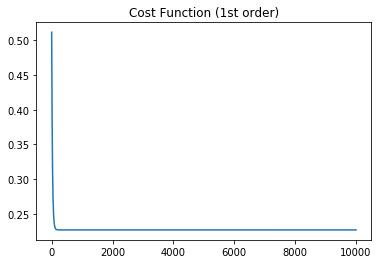

In [26]:
plt.plot(costValues11)
plt.title("Cost Function (1st order)")
plt.show()

In [27]:
RootMeanSquareError(Y11,np.dot(X11,W11opt))

0.47624021947640577

In [28]:
costValues11[-1]

0.2268047466469352

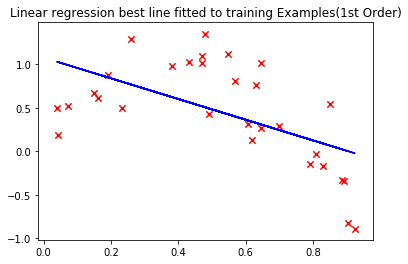

In [29]:
plt.scatter(X11inp,Y11,40,color="red",marker='x')
plt.plot(X11inp,np.dot(X11,W11opt),color='blue')
plt.title("Linear regression best line fitted to training Examples(1st Order)")
plt.show()

In [30]:
#Question 1.2
X12inp=np.array(data1['x'])
Y12=np.array(data1['y'])
X12,mean12,std12=createNormalizedInputMatrix(X12inp,2)
W12=createWeightMatrix(2)
costValues12=[0]*10000

In [31]:
W12opt=GradientDescedent(X12,W12,Y12,costValues12,10000,0.01)

In [32]:
W12opt

array([-1.51054877,  1.13554457,  0.45269151])

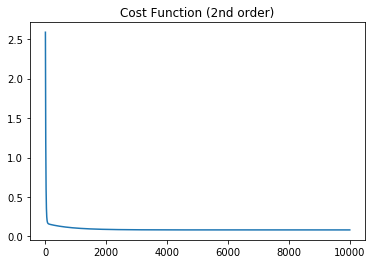

In [33]:
plt.plot(costValues12)
plt.title("Cost Function (2nd order)")
plt.show()

In [34]:
RootMeanSquareError(Y12,np.dot(X12,W12opt))

0.28569966573022276

In [35]:
costValues12[-1]

0.081624298998361003

In [36]:
X12test=np.ndarray(shape=(30,2))
X12test[:,0]=X12inp
X12test[:,1]=np.dot(X12,W12opt)

In [37]:
X12temp=X12test[X12test[:,0].argsort()]

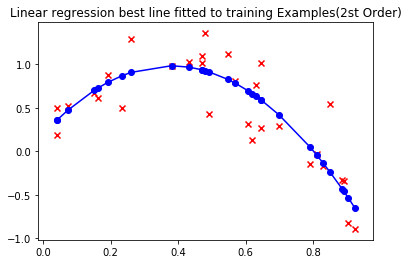

In [38]:
plt.scatter(X12inp,Y12,color="red",marker='x')
plt.plot(X12temp[:,0],X12temp[:,1],color="blue",marker='o')
plt.title("Linear regression best line fitted to training Examples(2st Order)")
plt.show()

In [39]:
#Question 1.3
X13inp=np.array(data1['x'])
Y13=np.array(data1['y'])
X13,mean13,std13=createNormalizedInputMatrix(X13inp,4)
W13=createWeightMatrix(4)
costValues13=[0]*10000

In [40]:
W13opt=GradientDescedent(X13,W13,Y13,costValues13,10000,0.01)

In [41]:
W13opt

array([-0.06367167, -0.60908549, -0.37325126,  0.64593858,  0.45269151])

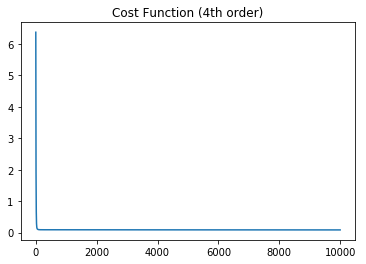

In [42]:
plt.plot(costValues13)
plt.title("Cost Function (4th order)")
plt.show()

In [43]:
RootMeanSquareError(Y13,np.dot(X13,W13opt))

0.29080429426921184

In [44]:
costValues13[-1]

0.084567137565414369

In [45]:
X13test=np.ndarray(shape=(30,2))
X13test[:,0]=X13inp
X13test[:,1]=np.dot(X13,W13opt)

In [46]:
X13temp=X13test[X13test[:,0].argsort()]

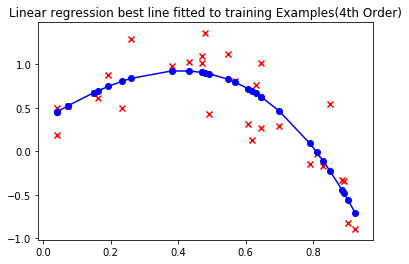

In [47]:
plt.scatter(X13inp,Y13,color="red",marker='x')
plt.plot(X13temp[:,0],X13temp[:,1],color="blue",marker='o')
plt.title("Linear regression best line fitted to training Examples(4th Order)")
plt.show()

In [48]:
#Question 1.4
X14inp=np.array(data1['x'])
Y14=np.array(data1['y'])
X14,mean14,std14=createNormalizedInputMatrix(X14inp,16)
W14=createWeightMatrix(16)
costValues14=[0]*10000

In [49]:
W14opt=GradientDescedent(X14,W14,Y14,costValues14,10000,0.01)

In [50]:
W14opt

array([-0.62840142, -0.32123418,  0.01937481,  0.19646793, -0.01405874,
        0.28577749,  0.30470658, -0.150086  ,  0.58861896,  0.61015093,
       -0.07461937, -0.07071489, -0.90837078, -0.85613977, -0.16735889,
        0.77811711,  0.45269151])

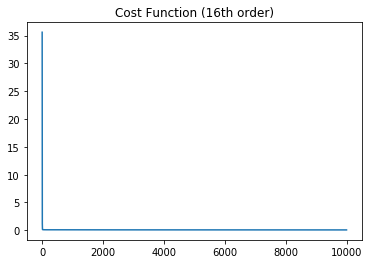

In [51]:
plt.plot(costValues14)
plt.title("Cost Function (16th order)")
plt.show()

In [52]:
RootMeanSquareError(Y14,np.dot(X14,W14opt))

0.26625306842048613

In [53]:
costValues14[-1]

0.070890696443324047

In [54]:
X14test=np.ndarray(shape=(30,2))
X14test[:,0]=X14inp
X14test[:,1]=np.dot(X14,W14opt)

In [55]:
X14temp=X14test[X14test[:,0].argsort()]

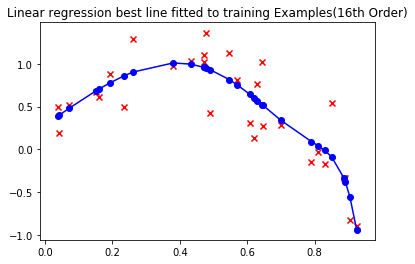

In [56]:
plt.scatter(X14inp,Y14,color="red",marker='x')
plt.plot(X14temp[:,0],X14temp[:,1],color="blue",marker='o')
plt.title("Linear regression best line fitted to training Examples(16th Order)")
plt.show()

In [57]:
#Question 1.5
X15inp=np.array(data1['x'])
Y15=np.array(data1['y'])
X15,mean15,std15=createNormalizedInputMatrix(X15inp,16)
W15=createWeightMatrix(16)
costValues15=[0]*10000

In [58]:
costValues151=[0]*10000

In [59]:
costValues152=[0]*10000

In [60]:
#for lambda=0.01
W15opt=GradientDescedentWithL2Regulization(X15,W15,Y15,costValues15,10000,0.01,0.01)

In [61]:
#for lambda=0.1
W151opt=GradientDescedentWithL2Regulization(X15,W15,Y15,costValues151,10000,0.01,0.1)

In [62]:
#for lambda=1
W152opt=GradientDescedentWithL2Regulization(X15,W15,Y15,costValues152,10000,0.01,1)

In [63]:
#for lambda=0.01
W15opt

array([-0.26126408, -0.54240721, -0.15440309,  0.26830767, -0.01307338,
        0.42860012, -0.12070379,  0.42785685,  0.3994096 , -0.14654361,
        0.35481721, -0.31407158, -0.10576671, -1.00402537, -0.52202645,
        0.90135326,  0.45254066])

In [64]:
#for lambda=0.1
W151opt

array([-0.24630142, -0.36278587, -0.11398984,  0.15079062,  0.02469509,
        0.2891824 ,  0.00143552,  0.30524425,  0.2785579 , -0.04882401,
        0.1799638 , -0.25075555, -0.20723791, -0.74559359, -0.4132068 ,
        0.74815729,  0.45118755])

In [65]:
#for lambda=1
W152opt

array([-0.06857383, -0.04246766, -0.01761748,  0.004147  ,  0.02061253,
        0.0322222 ,  0.03484432,  0.02921489,  0.01079571, -0.0223751 ,
       -0.06901602, -0.12943827, -0.189029  , -0.21592377, -0.11715906,
        0.30534419,  0.43808856])

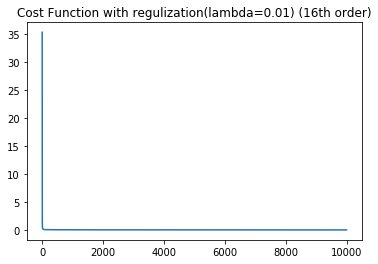

In [66]:
#for lambda=0.01
plt.plot(costValues15)
plt.title("Cost Function with regulization(lambda=0.01) (16th order)")
plt.show()

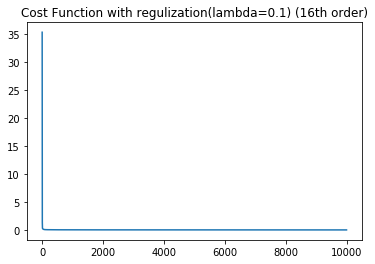

In [67]:
#for lambda=0.1
plt.plot(costValues151)
plt.title("Cost Function with regulization(lambda=0.1) (16th order)")
plt.show()

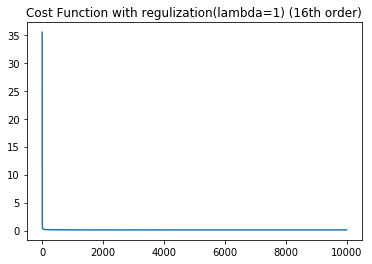

In [68]:
#for lambda=1
plt.plot(costValues152)
plt.title("Cost Function with regulization(lambda=1) (16th order)")
plt.show()

In [69]:
#for lambda=0.01
RootMeanSquareError(Y15,np.dot(X15,W15opt))

0.26804518187509691

In [70]:
#for lambda=0.1
RootMeanSquareError(Y15,np.dot(X15,W151opt))

0.27324187221397322

In [71]:
#for lambda=1
RootMeanSquareError(Y15,np.dot(X15,W152opt))

0.30191315319926909

In [72]:
#for lambda=0.01
costValues15[-1]

0.073032995806597403

In [73]:
#for lambda=0.1
costValues151[-1]

0.081706361512094552

In [74]:
#for lambda=1
costValues152[-1]

0.10494278012520437

In [75]:
X15test=np.ndarray(shape=(30,2))
X15test[:,0]=X15inp
X15test[:,1]=np.dot(X15,W15opt)

In [76]:
X15temp=X15test[X15test[:,0].argsort()]

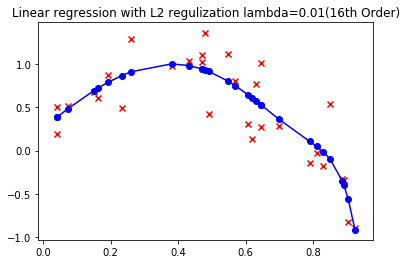

In [77]:
#for lambda=0.01
plt.scatter(X15inp,Y15,color="red",marker='x')
plt.plot(X15temp[:,0],X15temp[:,1],color="blue",marker='o')
plt.title("Linear regression with L2 regulization lambda=0.01(16th Order)")
plt.show()

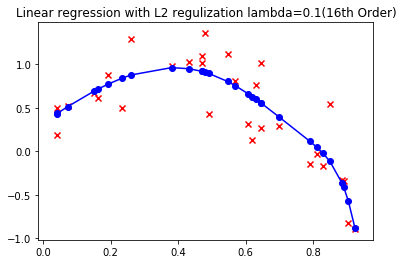

In [78]:
#for lambda=0.1
X151test=np.ndarray(shape=(30,2))
X151test[:,0]=X15inp
X151test[:,1]=np.dot(X15,W151opt)
X151temp=X151test[X151test[:,0].argsort()]
plt.scatter(X15inp,Y15,color="red",marker='x')
plt.plot(X151temp[:,0],X151temp[:,1],color="blue",marker='o')
plt.title("Linear regression with L2 regulization lambda=0.1(16th Order)")
plt.show()

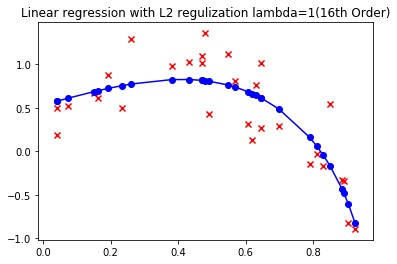

In [79]:
#for lambda=1
X152test=np.ndarray(shape=(30,2))
X152test[:,0]=X15inp
X152test[:,1]=np.dot(X15,W152opt)
X152temp=X152test[X152test[:,0].argsort()]
plt.scatter(X15inp,Y15,color="red",marker='x')
plt.plot(X152temp[:,0],X152temp[:,1],color="blue",marker='o')
plt.title("Linear regression with L2 regulization lambda=1(16th Order)")
plt.show()

In [80]:
#Question 1.6
X16inp=np.array(data1['x'])
Y16=np.array(data1['y'])
X16,mean16,std16=createNormalizedInputMatrix(X16inp,16)
clf = Ridge(alpha=0.1)

In [81]:
#Lambda=0.01
clf = Ridge(alpha=0.01)
clf.fit(X16,Y16)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [82]:
clf.coef_

array([-0.76402617, -0.49522932, -0.22434919,  0.03354927,  0.26138411,
        0.44025685,  0.54997205,  0.57016159,  0.48257989,  0.27573512,
       -0.04568321, -0.44149164, -0.79808756, -0.86967025, -0.28426183,
        0.9027091 ,  0.        ])

In [83]:
clf.intercept_

0.45269150943333336

In [84]:
Yp1=clf.predict(X16)

In [85]:
RootMeanSquareError(Y16,Yp1)   #***********************might be wrong

0.26283202460604804

In [86]:
costFunction(X16,clf.coef_,Y16)

0.27401027587154403

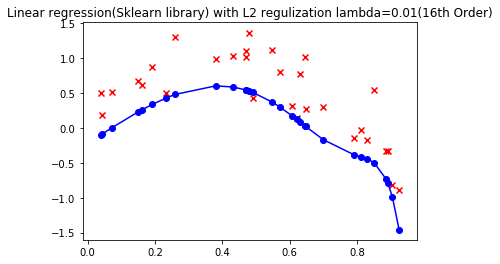

In [87]:
#for lambda=0.01
X161test=np.ndarray(shape=(30,2))
X161test[:,0]=X16inp
X161test[:,1]=np.dot(X16,clf.coef_)
X161temp=X161test[X161test[:,0].argsort()]
plt.scatter(X16inp,Y16,color="red",marker='x')
plt.plot(X161temp[:,0],X161temp[:,1],color="blue",marker='o')
plt.title("Linear regression(Sklearn library) with L2 regulization lambda=0.01(16th Order)")
plt.show()

In [88]:
#Lambda=0.1
clf1 = Ridge(alpha=1)
clf1.fit(X16,Y16)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [89]:
clf1.coef_

array([-0.06888419, -0.04215991, -0.01760999,  0.00379041,  0.02082246,
        0.03198174,  0.03545038,  0.02911397,  0.01069068, -0.02187918,
       -0.06945018, -0.12931817, -0.18959658, -0.21555533, -0.11714469,
        0.30532714,  0.        ])

In [90]:
clf1.intercept_

0.45269150943333331

In [91]:
Yp2=clf1.predict(X16)

In [92]:
RootMeanSquareError(Y16,Yp2)   #***********************might be wrong

0.30155469216639885

In [93]:
costFunction(X16,clf1.coef_,Y16)

0.2958648350806013

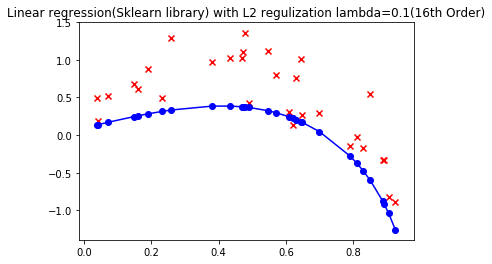

In [94]:
#for lambda=0.1
X162test=np.ndarray(shape=(30,2))
X162test[:,0]=X16inp
X162test[:,1]=np.dot(X16,clf1.coef_)
X162temp=X162test[X162test[:,0].argsort()]
plt.scatter(X16inp,Y16,color="red",marker='x')
plt.plot(X162temp[:,0],X162temp[:,1],color="blue",marker='o')
plt.title("Linear regression(Sklearn library) with L2 regulization lambda=0.1(16th Order)")
plt.show()

In [95]:
#Lambda=1
clf2 = Ridge(alpha=1)
clf2.fit(X16,Y16)
clf2.coef_

array([-0.06888419, -0.04215991, -0.01760999,  0.00379041,  0.02082246,
        0.03198174,  0.03545038,  0.02911397,  0.01069068, -0.02187918,
       -0.06945018, -0.12931817, -0.18959658, -0.21555533, -0.11714469,
        0.30532714,  0.        ])

In [96]:
Yp3=clf2.predict(X16)

In [97]:
RootMeanSquareError(Y16,Yp3)   #***********************might be wrong

0.30155469216639885

In [98]:
costFunction(X16,clf2.coef_,Y16)

0.29586483508060124

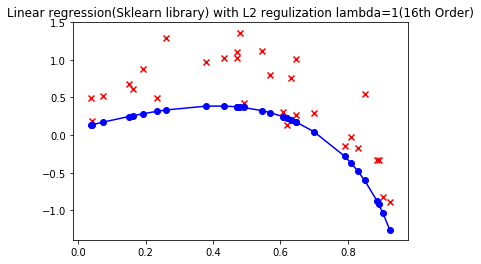

In [99]:
#for lambda=1
X163test=np.ndarray(shape=(30,2))
X163test[:,0]=X16inp
X163test[:,1]=np.dot(X16,clf2.coef_)
X163temp=X163test[X163test[:,0].argsort()]
plt.scatter(X16inp,Y16,color="red",marker='x')
plt.plot(X163temp[:,0],X163temp[:,1],color="blue",marker='o')
plt.title("Linear regression(Sklearn library) with L2 regulization lambda=1(16th Order)")
plt.show()

In [100]:
#Question 1.7
X17inp=np.array(data1['x'])
Y17=np.array(data1['y'])
X17,mean17,std17=createNormalizedInputMatrix(X17inp,16)


In [101]:
#lambda=0.001
clf21 = linear_model.Lasso(alpha=0.001,max_iter=100000)
clf21.fit(X17,Y17)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
clf21.coef_

array([-0.78010581, -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.1377948 ,  1.16873606,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -1.75315801, -0.        ,
        0.82207171,  0.        ])

In [103]:
clf21.intercept_

0.45269150943333347

In [104]:
Yp21=clf21.predict(X17)

In [105]:
RootMeanSquareError(Y17,Yp21)   #***********************might be wrong

0.2655419898346229

In [106]:
costFunction(X17,clf21.coef_,Y17)

0.27544215107836079

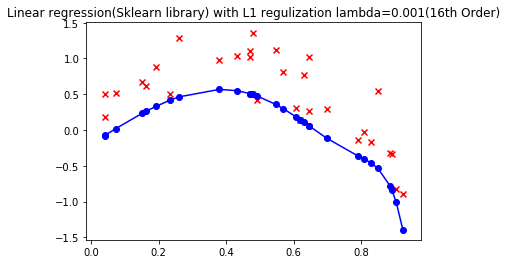

In [107]:
#for lambda=0.001
X171test=np.ndarray(shape=(30,2))
X171test[:,0]=X17inp
X171test[:,1]=np.dot(X17,clf21.coef_)
X171temp=X171test[X171test[:,0].argsort()]
plt.scatter(X17inp,Y17,color="red",marker='x')
plt.plot(X171temp[:,0],X171temp[:,1],color="blue",marker='o')
plt.title("Linear regression(Sklearn library) with L1 regulization lambda=0.001(16th Order)")
plt.show()

In [108]:
#lambda=0.01
clf22 = linear_model.Lasso(alpha=0.01,max_iter=10000)
clf22.fit(X17,Y17)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [109]:
clf22.coef_

array([-0.05103943, -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.39057881, -0.25000575, -0.        ,
        0.26229411,  0.        ])

In [110]:
clf22.intercept_

0.45269150943333331

In [111]:
Yp22=clf22.predict(X17)

In [112]:
RootMeanSquareError(Y17,Yp22) 

0.30287810773920915

In [113]:
costFunction(X17,clf22.coef_,Y17)

0.29666475086071376

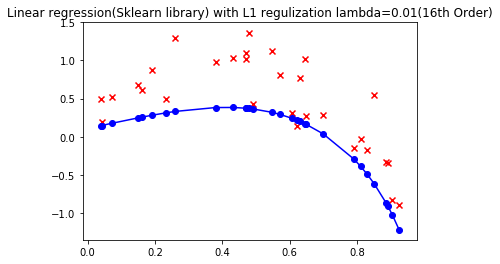

In [114]:
#for lambda=0.01
X172test=np.ndarray(shape=(30,2))
X172test[:,0]=X17inp
X172test[:,1]=np.dot(X17,clf22.coef_)
X172temp=X172test[X172test[:,0].argsort()]
plt.scatter(X17inp,Y17,color="red",marker='x')
plt.plot(X172temp[:,0],X172temp[:,1],color="blue",marker='o')
plt.title("Linear regression(Sklearn library) with L1 regulization lambda=0.01(16th Order)")
plt.show()

In [115]:
#lambda=0.08
clf23 = linear_model.Lasso(alpha=0.08,max_iter=10000)
clf23.fit(X17,Y17)

Lasso(alpha=0.08, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [116]:
clf23.coef_

array([-0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.39373874, -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ])

In [117]:
clf23.intercept_

0.45269150943333331

In [118]:
Yp23=clf23.predict(X17)

In [119]:
RootMeanSquareError(Y17,Yp23) 

0.33940451927382398

In [120]:
costFunction(X17,clf23.coef_,Y17)

0.32012503041652535

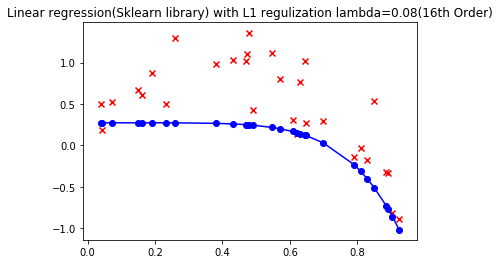

In [121]:
#for lambda=0.08
X173test=np.ndarray(shape=(30,2))
X173test[:,0]=X17inp
X173test[:,1]=np.dot(X17,clf23.coef_)
X173temp=X173test[X173test[:,0].argsort()]
plt.scatter(X17inp,Y17,color="red",marker='x')
plt.plot(X173temp[:,0],X173temp[:,1],color="blue",marker='o')
plt.title("Linear regression(Sklearn library) with L1 regulization lambda=0.08(16th Order)")
plt.show()

In [122]:
#Question 2.1
D21train,D21test,D21valid=splitDataSet(data2,0.6,0.2,0.2)

In [123]:
X21train=D21train['sqft_living']
Y21train=D21train['price']
X21,mean21,std21=createNormalizedInputMatrix(X21train,1)
W21=createWeightMatrix(1)
costValues21=[0]*1000

In [124]:
W21opt=GradientDescedent(X21,W21,Y21train,costValues21,1000,0.01)

In [125]:
W21opt

array([ 293663.94179918,  543475.44263871])

In [126]:
X21test=D21valid['sqft_living']
Y21test=D21valid['price']
X21_test=getNormalizedMatrixWithMeanandStd(X21test,mean21,std21,1)

In [127]:
Y21_pred=np.dot(X21_test,W21opt)

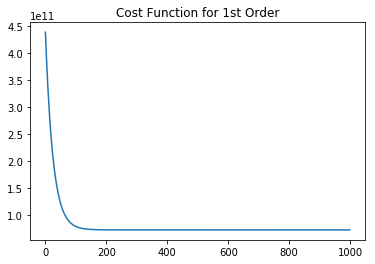

In [128]:
plt.plot(costValues21)
plt.title('Cost Function for 1st Order')
plt.show()

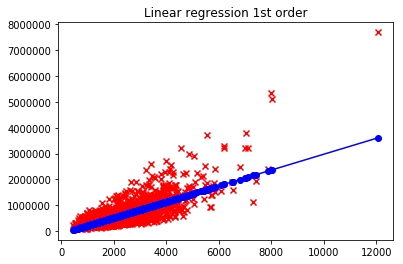

In [129]:
X21temp=np.ndarray(shape=(len(X21train),2))
X21temp[:,0]=X21train
X21temp[:,1]=np.dot(X21,W21opt)
X21temp=X21temp[X21temp[:,0].argsort()]
plt.scatter(X21train,Y21train,color="red",marker='x')
plt.plot(X21temp[:,0],X21temp[:,1],color="blue",marker='o')
plt.title("Linear regression 1st order")
plt.show()

In [130]:
#RMSE of training Data
RMSE(Y21train,np.dot(X21,W21opt),len(Y21train))

268022.3638394916

In [131]:
costValues21[-1]

71835987518.10881

In [132]:
#RMSE of testing Data
RMSE(Y21test,Y21_pred,len(Y21test))

261614.53678867157

In [133]:
#Question 2.2
X22train=D21train['sqft_living']
Y22train=D21train['price']
X22,mean22,std22=createNormalizedInputMatrix(X22train,2)
W22=createWeightMatrix(2)
costValues22=[0]*1000

In [134]:
W22opt=GradientDescedent(X22,W22,Y22train,costValues22,1000,0.01)

In [135]:
W22opt

array([ 276371.57584792,   39950.11458606,  543475.44263871])

In [136]:
X22test=D21valid['sqft_living']
Y22test=D21valid['price']
X22_test=getNormalizedMatrixWithMeanandStd(X22test,mean22,std22,2)

In [137]:
Y22_pred=np.dot(X22_test,W22opt)

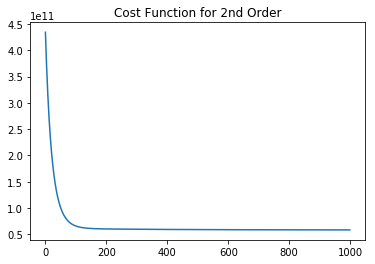

In [138]:
plt.plot(costValues22)
plt.title('Cost Function for 2nd Order')
plt.show()

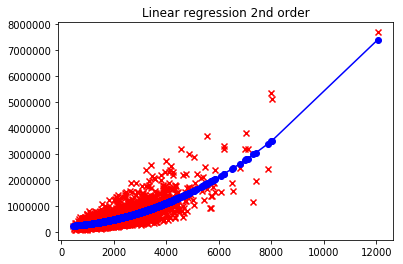

In [139]:
X22temp=np.ndarray(shape=(len(X22train),2))
X22temp[:,0]=X22train
X22temp[:,1]=np.dot(X22,W22opt)
X22temp=X22temp[X22temp[:,0].argsort()]
plt.scatter(X22train,Y22train,color="red",marker='x')
plt.plot(X22temp[:,0],X22temp[:,1],color="blue",marker='o')
plt.title("Linear regression 2nd order")
plt.show()

In [140]:
#RMSE of training Data
RMSE(Y22train,np.dot(X22,W22opt),len(Y22train))

241610.35750082467

In [141]:
costValues22[-1]

58375564851.676308

In [142]:
#RMSE of testing Data
RMSE(Y22test,Y22_pred,len(Y22test))

329640.65705683327

In [143]:
 #Question 2.3
X23train=D21train['sqft_living']
Y23train=D21train['price']
X23,mean23,std23=createNormalizedInputMatrix(X23train,4)
W23=createWeightMatrix(4)
costValues23=[0]*1000
W23opt=GradientDescedent(X23,W23,Y23train,costValues23,1000,0.01)
W23opt

array([ -11075.78235272,   91382.52162582,  149055.73235442,
         97440.16290858,  543475.44263871])

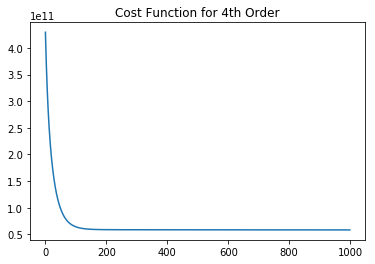

In [144]:
X23test=D21valid['sqft_living']
Y23test=D21valid['price']
X23_test=getNormalizedMatrixWithMeanandStd(X23test,mean23,std23,4)
Y23_pred=np.dot(X23_test,W23opt)
plt.plot(costValues23)
plt.title('Cost Function for 4th Order')
plt.show()

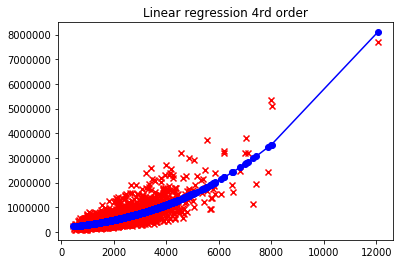

In [145]:
X23temp=np.ndarray(shape=(len(X23train),2))
X23temp[:,0]=X23train
X23temp[:,1]=np.dot(X23,W23opt)
X23temp=X23temp[X23temp[:,0].argsort()]
plt.scatter(X23train,Y23train,color="red",marker='x')
plt.plot(X23temp[:,0],X23temp[:,1],color="blue",marker='o')
plt.title("Linear regression 4rd order")
plt.show()

In [146]:
#RMSE of training Data
RMSE(Y23train,np.dot(X23,W23opt),len(Y23train))

241877.55971799165

In [147]:
costValues23[-1]

58504753895.130623

In [148]:
#RMSE of testing Data
RMSE(Y23test,Y23_pred,len(Y23test))

353646.90739323146

In [149]:
 #Question 2.4
X24train=D21train['sqft_living']
Y24train=D21train['price']
X24,mean24,std24=createNormalizedInputMatrix(X24train,16)
W24=createWeightMatrix(16)
costValues24=[0]*1000
W24opt=GradientDescedent(X24,W24,Y24train,costValues24,1000,0.01)
W24opt

array([ -5.46736818e+02,   2.12280578e+02,   1.52855916e+03,
        -3.72480138e+03,  -4.34949991e+03,   9.76337538e+02,
         7.43841789e+02,   2.75770250e+03,   3.88430653e+03,
        -8.82266292e+02,   1.30167197e+03,  -3.78931940e+03,
        -1.14557219e+04,   9.07677235e+04,   1.49110192e+05,
         1.00090869e+05,   5.43475443e+05])

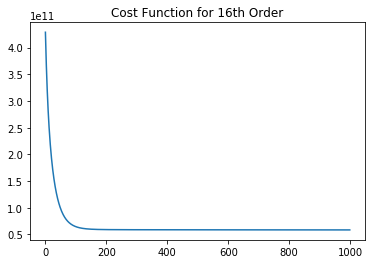

In [150]:
X24test=D21valid['sqft_living']
Y24test=D21valid['price']
X24_test=getNormalizedMatrixWithMeanandStd(X24test,mean24,std24,16)
Y24_pred=np.dot(X24_test,W24opt)
plt.plot(costValues24)
plt.title('Cost Function for 16th Order')
plt.show()

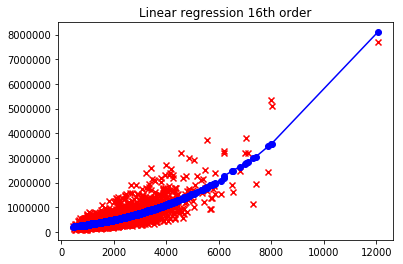

In [151]:
X24temp=np.ndarray(shape=(len(X24train),2))
X24temp[:,0]=X24train
X24temp[:,1]=np.dot(X24,W24opt)
X24temp=X24temp[X24temp[:,0].argsort()]
plt.scatter(X24train,Y24train,color="red",marker='x')
plt.plot(X24temp[:,0],X24temp[:,1],color="blue",marker='o')
plt.title("Linear regression 16th order")
plt.show()

In [152]:
#RMSE of training Data
RMSE(Y24train,np.dot(X24,W24opt),len(Y24train))

241753.53845431437

In [153]:
costValues24[-1]

58444773355.181656

In [154]:
#RMSE of testing Data
RMSE(Y24test,Y24_pred,len(Y24test))

354178.44253358844

In [155]:
#Question 2.5
weights_values = []
lambda_values = []
lambda_values.append(0.1)

#Lambda=0.1

X251train=D21train['sqft_living']
Y251train=D21train['price']
X251,mean251,std251=createNormalizedInputMatrix(X251train,16)
W251=createWeightMatrix(16)
costValues251=[0]*1000
W251opt=GradientDescedentWithL2Regulization(X251,W251,Y251train,costValues251,1000,0.01,0.1)
W251opt

array([ -5.46837647e+02,   2.12083883e+02,   1.52829424e+03,
        -3.72472258e+03,  -4.34941889e+03,   9.76371132e+02,
         7.43803260e+02,   2.75759295e+03,   3.88413286e+03,
        -8.81900402e+02,   1.30144289e+03,  -3.78530231e+03,
        -1.14422964e+04,   9.07610987e+04,   1.49095829e+05,
         1.00096627e+05,   5.43458680e+05])

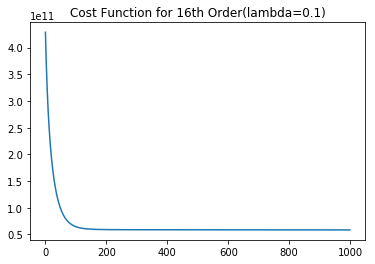

In [156]:
X251test=D21valid['sqft_living']
Y251test=D21valid['price']
X251_test=getNormalizedMatrixWithMeanandStd(X251test,mean251,std251,16)
Y251_pred=np.dot(X251_test,W251opt)
plt.plot(costValues251)
plt.title('Cost Function for 16th Order(lambda=0.1)')
plt.show()

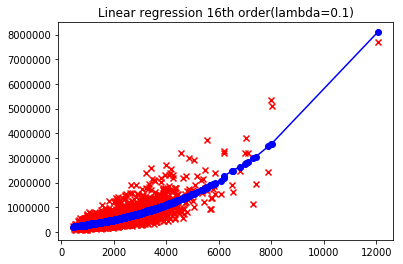

In [157]:
X251temp=np.ndarray(shape=(len(X251train),2))
X251temp[:,0]=X251train
X251temp[:,1]=np.dot(X251,W251opt)
X251temp=X251temp[X251temp[:,0].argsort()]
plt.scatter(X251train,Y251train,color="red",marker='x')
plt.plot(X251temp[:,0],X251temp[:,1],color="blue",marker='o')
plt.title("Linear regression 16th order(lambda=0.1)")
plt.show()

In [158]:
#RMSE of training Data
RMSE(Y251train,np.dot(X251,W251opt),len(Y251train))

241753.78146739517

In [159]:
costValues251[-1]

58455256097.72879

In [160]:
#RMSE of testing Data
RMSE(Y251test,Y251_pred,len(Y251test))

354184.1967372309

In [161]:
weights_values.append(W251opt.reshape(17))

In [162]:
lambda_values.append(100)

#Lambda=100

X252train=D21train['sqft_living']
Y252train=D21train['price']
X252,mean252,std252=createNormalizedInputMatrix(X252train,16)
W252=createWeightMatrix(16)
costValues252=[0]*1000
W252opt=GradientDescedentWithL2Regulization(X252,W252,Y252train,costValues252,1000,0.01,100)
W252opt

array([ -6.38430091e+02,  -3.50629563e+00,   1.28183601e+03,
        -3.65082174e+03,  -4.25971413e+03,   9.79719541e+02,
         6.87178438e+02,   2.65642309e+03,   3.71283617e+03,
        -5.54177590e+02,   1.05812402e+03,  -2.14507198e+02,
        -1.43088241e+02,   8.51341345e+04,   1.37393500e+05,
         1.04002990e+05,   5.27213461e+05])

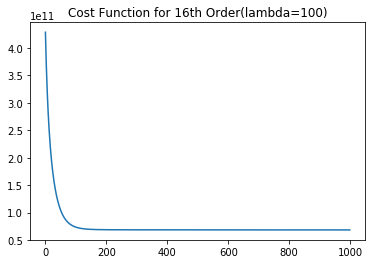

In [163]:
X252test=D21valid['sqft_living']
Y252test=D21valid['price']
X252_test=getNormalizedMatrixWithMeanandStd(X252test,mean252,std252,16)
Y252_pred=np.dot(X252_test,W252opt)
plt.plot(costValues252)
plt.title('Cost Function for 16th Order(lambda=100)')
plt.show()

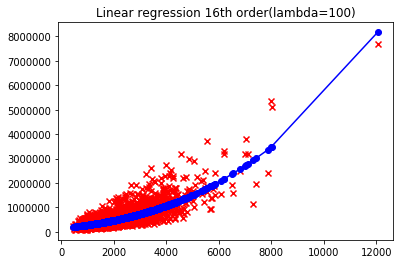

In [164]:
X252temp=np.ndarray(shape=(len(X252train),2))
X252temp[:,0]=X252train
X252temp[:,1]=np.dot(X252,W252opt)
X252temp=X252temp[X252temp[:,0].argsort()]
plt.scatter(X252train,Y252train,color="red",marker='x')
plt.plot(X252temp[:,0],X252temp[:,1],color="blue",marker='o')
plt.title("Linear regression 16th order(lambda=100)")
plt.show()

In [165]:
#RMSE of training Data
RMSE(Y252train,np.dot(X252,W252opt),len(Y252train))

242557.81441073105

In [166]:
costValues252[-1]

68549060185.680656

In [167]:
#RMSE of testing Data
RMSE(Y252test,Y252_pred,len(Y252test))

359319.96548422304

In [168]:
weights_values.append(W252opt.reshape(17))

In [169]:
lambda_values.append(80000)

#Lambda=800

X253train=D21train['sqft_living']
Y253train=D21train['price']
X253,mean253,std253=createNormalizedInputMatrix(X253train,16)
W253=createWeightMatrix(16)
costValues253=[0]*1000
W253opt=GradientDescedentWithL2Regulization(X253,W253,Y253train,costValues253,1000,0.01,80000)
W253opt

array([  -310.20289386,   -647.4302254 ,   -115.3291815 ,     67.4582006 ,
         -176.16398974,    113.63512664,   -253.63750185,   -102.41240357,
         -157.47360564,    425.34429068,   -555.84570045,   3986.61841438,
         8060.53056722,  10150.58821728,  11274.91445705,  10525.73177997,
        21166.56721367])

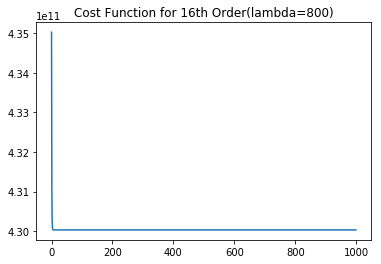

In [170]:
X253test=D21valid['sqft_living']
Y253test=D21valid['price']
X253_test=getNormalizedMatrixWithMeanandStd(X253test,mean253,std253,16)
Y253_pred=np.dot(X253_test,W253opt)
plt.plot(costValues253)
plt.title('Cost Function for 16th Order(lambda=800)')
plt.show()

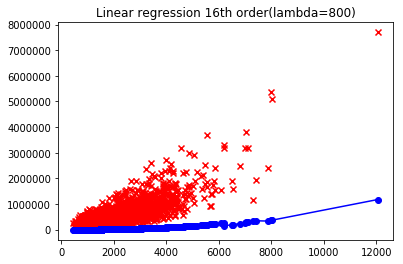

In [171]:
X253temp=np.ndarray(shape=(len(X253train),2))
X253temp[:,0]=X253train
X253temp[:,1]=np.dot(X253,W253opt)
X253temp=X253temp[X253temp[:,0].argsort()]
plt.scatter(X253train,Y253train,color="red",marker='x')
plt.plot(X253temp[:,0],X253temp[:,1],color="blue",marker='o')
plt.title("Linear regression 16th order(lambda=800)")
plt.show()

In [172]:
#RMSE of training Data
RMSE(Y253train,np.dot(X253,W253opt),len(Y253train))

639170.274494103

In [173]:
costValues253[-1]

430031661486.53625

In [174]:
#RMSE of testing Data
RMSE(Y253test,Y253_pred,len(Y253test))

640608.2169653461

In [175]:
weights_values.append(W253opt.reshape(17))

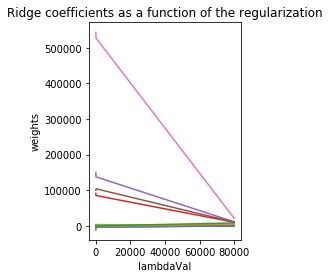

In [176]:
lambdaVal = np.asarray([0.1,100,80000])
plt.subplot(121)
ax = plt.gca()
ax.plot(lambdaVal, weights_values)
plt.xlabel('lambdaVal')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.show()

In [177]:
#Question 2.6
#Lambda=0.1
X261train=D21train['sqft_living']
Y261train=D21train['price']
X261,mean261,std261=createNormalizedInputMatrix(X261train,16)
clf261 = Ridge(alpha=0.1)
clf261.fit(X261,Y261train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [178]:
clf261.coef_

array([ -1.60228843e+02,  -1.76646540e+03,   1.35204387e+03,
        -4.67830246e+03,  -3.83055120e+03,  -1.55610494e+03,
        -5.20122908e+02,   3.47598740e+03,   3.97560853e+03,
        -2.04344809e+03,  -1.05742612e+03,  -1.31832259e+04,
         6.82119518e+04,  -1.93100371e+05,   5.20553617e+05,
        -7.91735356e+04,   0.00000000e+00])

In [179]:
clf261.intercept_

543475.44355336169

In [180]:
Yp261=clf261.predict(X261)

In [181]:
RMSE(Yp261,Y261train,len(Y261train))

240809.69026447588

In [182]:
X261test=D21valid['sqft_living']
Y261test=D21valid['price']
X261_test=getNormalizedMatrixWithMeanandStd(X261test,mean261,std261,16)
Y261val=clf261.predict(X261_test)

In [183]:
RMSE(Y261val,Y261test,len(Y261val))

341265.2282758063

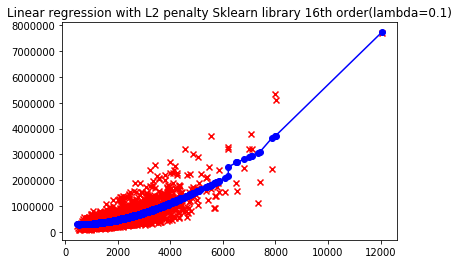

In [184]:
X261temp=np.ndarray(shape=(len(X261train),2))
X261temp[:,0]=X261train
X261temp[:,1]=Yp261
X261temp=X261temp[X261temp[:,0].argsort()]
plt.scatter(X261train,Y261train,color="red",marker='x')
plt.plot(X261temp[:,0],X261temp[:,1],color="blue",marker='o')
plt.title("Linear regression with L2 penalty Sklearn library 16th order(lambda=0.1)")
plt.show()

In [185]:
#Lambda=10
X262train=D21train['sqft_living']
Y262train=D21train['price']
X262,mean262,std262=createNormalizedInputMatrix(X262train,16)
clf262 = Ridge(alpha=10)
clf262.fit(X262,Y262train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [186]:
clf262.coef_

array([   -459.26820147,   -1504.5191899 ,    1312.09804366,
         -4251.59962609,   -4036.81022012,    -504.26371951,
          -257.51405321,    3209.95269619,    3883.12210539,
         -1388.89029654,    -283.38567123,   -8637.69266078,
        -55492.49993513,  105076.88129227,  231391.17325014,
         34976.04394437,       0.        ])

In [187]:
clf262.intercept_

543475.44355336251

In [188]:
Yp262=clf262.predict(X262)

In [189]:
RMSE(Yp262,Y262train,len(Y262train))

240982.68246089751

In [190]:
X262test=D21valid['sqft_living']
Y262test=D21valid['price']
X262_test=getNormalizedMatrixWithMeanandStd(X262test,mean262,std262,16)
Y262val=clf262.predict(X262_test)

In [191]:
RMSE(Y262val,Y262test,len(Y262val))

334613.41737063887

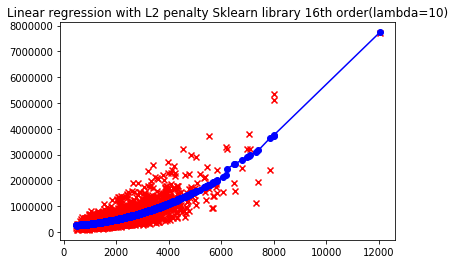

In [192]:
X262temp=np.ndarray(shape=(len(X262train),2))
X262temp[:,0]=X262train
X262temp[:,1]=Yp262
X262temp=X262temp[X262temp[:,0].argsort()]
plt.scatter(X262train,Y262train,color="red",marker='x')
plt.plot(X262temp[:,0],X262temp[:,1],color="blue",marker='o')
plt.title("Linear regression with L2 penalty Sklearn library 16th order(lambda=10)")
plt.show()

In [193]:
#Lambda=100
X263train=D21train['sqft_living']
Y263train=D21train['price']
X263,mean263,std263=createNormalizedInputMatrix(X263train,16)
clf263 = Ridge(alpha=100)
clf263.fit(X263,Y263train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [194]:
clf263.coef_

array([   -617.50664572,    -459.52008189,    1230.2329436 ,
         -3787.74341388,   -4180.86191799,     596.6864224 ,
           421.07558316,    2777.19887983,    3715.5256747 ,
          -690.09233692,     649.09680774,   -1566.50520998,
        -14993.12140801,   95149.12248711,  154483.15922787,
         88370.05793459,       0.        ])

In [195]:
clf263.intercept_

543475.44355336227

In [196]:
Yp263=clf263.predict(X263)

In [197]:
RMSE(Yp263,Y263train,len(Y263train))

241663.72634932786

In [198]:
X263test=D21valid['sqft_living']
Y263test=D21valid['price']
X263_test=getNormalizedMatrixWithMeanandStd(X263test,mean263,std263,16)
Y263val=clf263.predict(X263_test)

In [199]:
RMSE(Y263val,Y263test,len(Y263val))

353307.6424510758

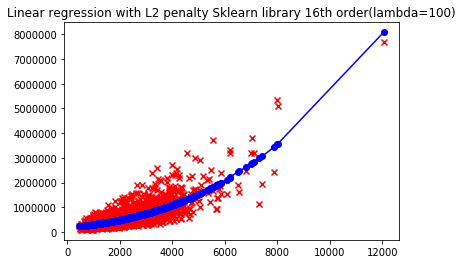

In [200]:
X263temp=np.ndarray(shape=(len(X263train),2))
X263temp[:,0]=X263train
X263temp[:,1]=Yp263
X263temp=X263temp[X263temp[:,0].argsort()]
plt.scatter(X263train,Y263train,color="red",marker='x')
plt.plot(X263temp[:,0],X263temp[:,1],color="blue",marker='o')
plt.title("Linear regression with L2 penalty Sklearn library 16th order(lambda=100)")
plt.show()

In [201]:
#Question 2.7
#lambda=1
X271train=D21train['sqft_living']
Y271train=D21train['price']
X271,mean271,std271=createNormalizedInputMatrix(X271train,16)
clf271 = linear_model.Lasso(alpha=1,max_iter=100000)
clf271.fit(X271,Y271train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [202]:
clf271.coef_

array([ -1.29473951e+02,  -1.76010167e+03,   1.35712609e+03,
        -4.71169829e+03,  -3.81238109e+03,  -1.63889251e+03,
        -5.27097404e+02,   3.49276276e+03,   3.98226909e+03,
        -2.09901465e+03,  -1.11036731e+03,  -1.35311073e+04,
         8.28368800e+04,  -2.26118374e+05,   5.50303937e+05,
        -9.02289422e+04,   0.00000000e+00])

In [203]:
clf271.intercept_

543475.44355336169

In [204]:
Yp271=clf271.predict(X271)

In [205]:
RMSE(Yp271,Y271train,len(Yp271))

240807.982048032

In [206]:
X271test=D21valid['sqft_living']
Y271test=D21valid['price']
X271_test=getNormalizedMatrixWithMeanandStd(X271test,mean271,std271,16)
Y271val=clf271.predict(X271_test)

In [207]:
RMSE(Y271val,Y271test,len(Y271val))

342483.1820435419

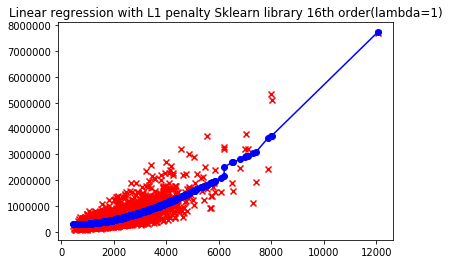

In [208]:
X271temp=np.ndarray(shape=(len(X271train),2))
X271temp[:,0]=X271train
X271temp[:,1]=Yp271
X271temp=X271temp[X271temp[:,0].argsort()]
plt.scatter(X271train,Y271train,color="red",marker='x')
plt.plot(X271temp[:,0],X271temp[:,1],color="blue",marker='o')
plt.title("Linear regression with L1 penalty Sklearn library 16th order(lambda=1)")
plt.show()

In [209]:
#lambda=100
X272train=D21train['sqft_living']
Y272train=D21train['price']
X272,mean272,std272=createNormalizedInputMatrix(X272train,16)
clf272 = linear_model.Lasso(alpha=100,max_iter=100000)
clf272.fit(X272,Y272train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [210]:
clf272.coef_

array([ -2.33501680e+02,  -1.60898999e+03,   1.24719111e+03,
        -4.33193742e+03,  -3.82775666e+03,  -9.28341832e+02,
        -3.15473934e+02,   3.20151280e+03,   3.78683625e+03,
        -1.57270229e+03,  -5.65711406e+02,  -1.08159267e+04,
        -1.54900552e+04,  -0.00000000e+00,   3.42138839e+05,
        -1.13224067e+04,   0.00000000e+00])

In [211]:
clf272.intercept_

543475.44355336227

In [212]:
Yp272=clf272.predict(X272)

In [213]:
RMSE(Yp272,Y272train,len(Yp272))

240876.41250613067

In [214]:
X272test=D21valid['sqft_living']
Y272test=D21valid['price']
X272_test=getNormalizedMatrixWithMeanandStd(X272test,mean272,std272,16)
Y272val=clf272.predict(X272_test)

In [215]:
RMSE(Y272val,Y272test,len(Y272val))

335219.0356406545

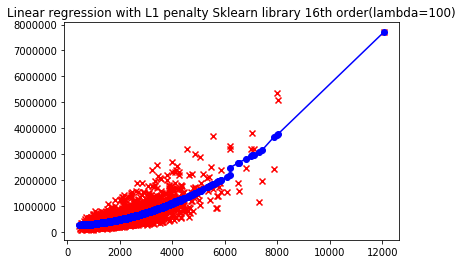

In [216]:
X272temp=np.ndarray(shape=(len(X272train),2))
X272temp[:,0]=X272train
X272temp[:,1]=Yp272
X272temp=X272temp[X272temp[:,0].argsort()]
plt.scatter(X272train,Y272train,color="red",marker='x')
plt.plot(X272temp[:,0],X272temp[:,1],color="blue",marker='o')
plt.title("Linear regression with L1 penalty Sklearn library 16th order(lambda=100)")
plt.show()

In [217]:
#lambda=10000
X273train=D21train['sqft_living']
Y273train=D21train['price']
X273,mean273,std273=createNormalizedInputMatrix(X273train,16)
clf273 = linear_model.Lasso(alpha=10000,max_iter=100000)
clf273.fit(X273,Y273train)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [218]:
clf273.coef_

array([     -0.        ,      -0.        ,       0.        ,
            -0.        ,      -0.        ,      -0.        ,
            -0.        ,       0.        ,       0.        ,
            -0.        ,      -0.        ,      -0.        ,
             0.        ,       0.        ,  306048.69801268,
             0.        ,       0.        ])

In [219]:
clf273.intercept_

543475.44355336216

In [220]:
Yp273=clf273.predict(X273)

In [221]:
RMSE(Yp273,Y273train,len(Yp273))

241428.49667324542

In [222]:
X273test=D21valid['sqft_living']
Y273test=D21valid['price']
X273_test=getNormalizedMatrixWithMeanandStd(X273test,mean273,std273,16)
Y273val=clf273.predict(X273_test)

In [223]:
RMSE(Y273val,Y273test,len(Y273val))

338044.1785564635

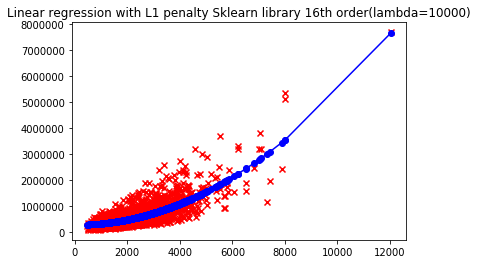

In [224]:
X273temp=np.ndarray(shape=(len(X273train),2))
X273temp[:,0]=X273train
X273temp[:,1]=Yp273
X273temp=X273temp[X273temp[:,0].argsort()]
plt.scatter(X273train,Y273train,color="red",marker='x')
plt.plot(X273temp[:,0],X273temp[:,1],color="blue",marker='o')
plt.title("Linear regression with L1 penalty Sklearn library 16th order(lambda=10000)")
plt.show()

In [225]:
#Question 3.1
D31train,D31test,D31valid=splitDataSet(data3,0.6,0.2,0.2)

In [226]:
#Lambda=0.1
X31train=np.array(D31train)

In [227]:
X31=X31train[:,[0,1,2,3,4,5,6,7]]

In [228]:
Y31train=X31train[:,8]

In [229]:
Y31train

array([ 3.55 ,  0.707,  2.294, ...,  0.728,  1.105,  2.353])

In [230]:
X31trainmean=np.mean(X31,axis=0)

In [231]:
X31trainstd=np.std(X31,axis=0)

In [232]:
X31n=(X31-X31trainmean)/X31trainstd

In [233]:
clf311 = Ridge(alpha=0.00001,max_iter=10000)
clf311.fit(X31n,Y31train)

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [234]:
clf311.coef_

array([  8.59125349e-01,   1.21753708e-01,  -3.03150645e-01,
         3.33296190e-01,   6.30943320e-04,  -4.98669152e-02,
        -8.93091299e-01,  -8.66177261e-01])

In [235]:
clf311.intercept_

2.0631830482881126

In [236]:
weights_values31 = []

In [237]:
weights_values31.append(clf311.coef_.reshape(8))

In [238]:
Yp311=clf311.predict(X31n)

In [239]:
RMSE(Yp311,Y31train,len(Yp311))

0.7238452000065543

In [240]:
X31val=np.array(D31valid)
X31valid=X31val[:,[0,1,2,3,4,5,6,7]]
Y31valid=X31val[:,8]

In [241]:
X31valid=(X31valid-X31trainmean)/X31trainstd

In [242]:
Ypred311=clf311.predict(X31valid)

In [243]:
RMSE(Ypred311,Y31valid,len(Ypred311))

0.7448513426926016

In [244]:
#Lambda=0.001
clf312 = Ridge(alpha=0.001,max_iter=10000)
clf312.fit(X31n,Y31train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [245]:
clf312.coef_

array([  8.59125285e-01,   1.21753812e-01,  -3.03150427e-01,
         3.33295895e-01,   6.30977935e-04,  -4.98669158e-02,
        -8.93090274e-01,  -8.66176225e-01])

In [246]:
clf311.intercept_

2.0631830482881126

In [247]:
weights_values31.append(clf312.coef_.reshape(8))

In [248]:
Yp312=clf312.predict(X31n)

In [249]:
RMSE(Yp312,Y31train,len(Yp312))

0.7238452000066681

In [250]:
Ypred312=clf312.predict(X31valid)

In [251]:
RMSE(Ypred312,Y31valid,len(Ypred312))

0.7448512967857708

In [252]:
#Lambda=80000
clf313 = Ridge(alpha=10000,max_iter=80000)
clf313.fit(X31n,Y31train)

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=80000,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [253]:
clf313.coef_

array([ 0.42775518,  0.0967366 ,  0.04409477, -0.033596  , -0.00128109,
       -0.0219353 , -0.11535191, -0.07742962])

In [254]:
clf313.intercept_

2.0631830482881139

In [255]:
weights_values31.append(clf313.coef_.reshape(8))

In [256]:
Yp313=clf313.predict(X31n)

In [257]:
RMSE(Yp313,Y31train,len(Yp313))

0.8802497905170699

In [258]:
Ypred313=clf313.predict(X31valid)

In [259]:
RMSE(Ypred313,Y31valid,len(Ypred313))

0.8768229441541375

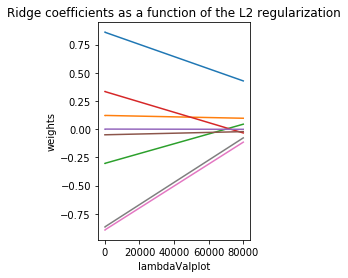

In [260]:
lambdaVal31 = np.asarray([0.00001,0.001,80000])
plt.subplot(122)
ax = plt.gca()
ax.plot(lambdaVal31, weights_values31)
plt.xlabel('lambdaValplot')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the L2 regularization')
plt.axis('tight')

plt.show()

In [261]:
#Question 3.2
#lambda=0.00001
clf321 = linear_model.Lasso(alpha=0.00001,max_iter=10000)
clf321.fit(X31n,Y31train)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [262]:
weights_values32 = []

In [263]:
clf321.coef_

array([  8.59074557e-01,   1.21754314e-01,  -3.03036641e-01,
         3.33178549e-01,   6.20704728e-04,  -4.98550211e-02,
        -8.92983113e-01,  -8.66061407e-01])

In [264]:
clf321.intercept_

2.0631830482881126

In [265]:
weights_values32.append(clf321.coef_.reshape(8))

In [266]:
Yp321=clf321.predict(X31n)
RMSE(Yp321,Y31train,len(Yp321))

0.7238452036597299

In [267]:
Ypred321=clf321.predict(X31valid)
RMSE(Ypred321,Y31valid,len(Ypred321))

0.7448366255796613

In [268]:
#lambda=0.001
clf322 = linear_model.Lasso(alpha=0.001,max_iter=10000)
clf322.fit(X31n,Y31train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [269]:
clf322.coef_

array([ 0.85403485,  0.12194119, -0.29168094,  0.32151217,  0.        ,
       -0.04870563, -0.88222424, -0.85456898])

In [270]:
clf322.intercept_

2.0631830482881126

In [271]:
weights_values32.append(clf322.coef_.reshape(8))

In [272]:
Yp322=clf322.predict(X31n)
RMSE(Yp322,Y31train,len(Yp322))

0.7238813026496782

In [273]:
Ypred322=clf322.predict(X31valid)
RMSE(Ypred322,Y31valid,len(Ypred322))

0.7434441820076917

In [274]:
#lambda=1
clf323 = linear_model.Lasso(alpha=1,max_iter=10000)
clf323.fit(X31n,Y31train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [275]:
clf323.coef_

array([ 0.,  0.,  0., -0., -0., -0., -0., -0.])

In [276]:
clf323.intercept_

2.0631830482881139

In [277]:
weights_values32.append(clf323.coef_.reshape(8))

In [278]:
Yp323=clf323.predict(X31n)
RMSE(Yp323,Y31train,len(Yp323))

1.1550938332122291

In [279]:
Ypred323=clf323.predict(X31valid)
RMSE(Ypred323,Y31valid,len(Ypred323))

1.1483545379280544

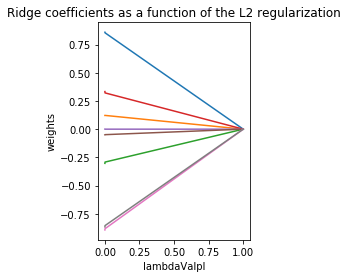

In [280]:
lambdaVal32 = np.asarray([0.00001,0.001,1])
plt.subplot(121)
ax = plt.gca()
ax.plot(lambdaVal32, weights_values32)
plt.xlabel('lambdaValpl')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the L2 regularization')
plt.axis('tight')

plt.show()

Used Lambda:  0.1


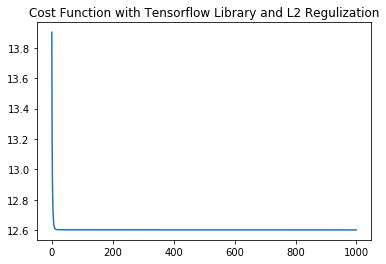

Optimized Weights: [[ -2.22257324e-08]
 [ -7.03543961e-08]
 [  2.52948329e-08]
 [ -2.68407927e-08]
 [ -2.81551387e-08]
 [  2.12266400e-08]
 [ -3.56036800e-09]
 [  3.99999180e-08]]
Training RMSE: 3.5500000000000007
Validation RMSE: 1.3749999990928279

Used Lambda:  1000


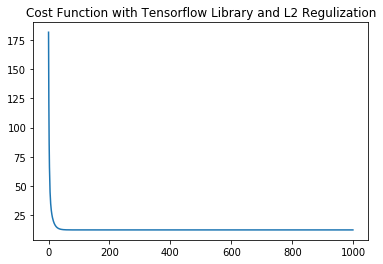

Optimized Weights: [[ -2.24949677e-08]
 [ -5.49099219e-08]
 [  1.63298886e-08]
 [ -1.53052842e-08]
 [ -2.05117736e-08]
 [  1.94067269e-08]
 [ -4.89610557e-08]
 [  1.47877266e-08]]
Training RMSE: 3.550000000000001
Validation RMSE: 1.374999999490635

Used Lambda:  50000


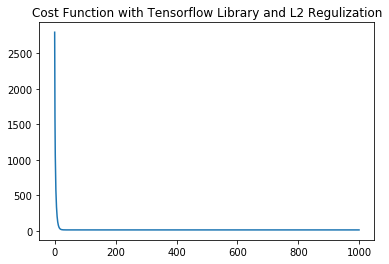

Optimized Weights: [[ -3.05175774e-10]
 [ -1.22070309e-08]
 [  3.81469700e-09]
 [  3.05175774e-10]
 [ -6.10351547e-10]
 [  4.67936179e-09]
 [ -1.02996829e-08]
 [  1.15203855e-08]]
Training RMSE: 3.55
Validation RMSE: 1.3749999998346345



In [355]:
#Question 3.3
lambdas = [0.1,1000,50000]
All_weights = []
for lambd in lambdas:
    print("Used Lambda: ", lambd)
    All_weights.append(Tf_Gradient_L2(X31n,X31valid,Y31train,Y31valid,lambd,0.0001,1000))
    print()


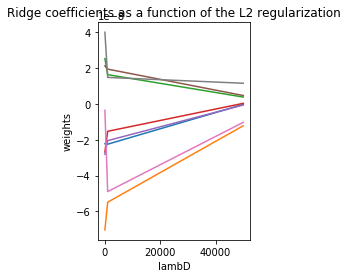

In [356]:
lambdaVal = np.asarray(lambdas)
plt.subplot(122)
ax = plt.gca()
ax.plot(lambdaVal, All_weights)
plt.xlabel('lambD')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the L2 regularization')
plt.axis('tight')
plt.show()

In [357]:
#Question 3.4
def Tf_Gradient_L1(X31n,X31valid,Y31train,Y31valid,lambd,alpha,train_epochs):
    m = np.float32(X31n[0].shape)
    Xtf33train = tf.constant(X31n, dtype = tf.float32, name = 'X_33train')
    Xtf33val = tf.constant(X31valid, dtype = tf.float32, name = 'X_33val')
    Ytf33train = tf.constant(Y31train, dtype = tf.float32, name = 'Y_33train')
    Ytf33val = tf.constant(Y31valid, dtype = tf.float32, name = 'Y_33val')
    n_dim = X31n.shape[1]
    X31nn=tf.cast(X31n,tf.float32)
    
    X_tf = tf.placeholder(tf.float32,[None,n_dim], name = 'X_tf')
    Y_tf = tf.placeholder(tf.float32,[None,1], name = 'Y_tf')
    
    Ytemp=np.ndarray(shape=(Ytf33train.shape[0],1))
    Ytemp[:,0]=Y31train[0]
    weights=[]
    cost_history=[]
    
    theta = tf.Variable(tf.random_uniform([n_dim, 1], -1.0, 1.0), name = 'theta')
    init2 = tf.global_variables_initializer()
    Y_pred = tf.matmul(X31nn, theta, name = 'Predictions')
    error = Y_pred - Ytemp
    rmse = tf.sqrt(tf.reduce_mean(tf.square(error)), name = 'rmse')
    base_loss = tf.reduce_mean(tf.square(error), name = 'loss')
    reg_loss = tf.reduce_sum(tf.abs(theta))
    loss = tf.add(base_loss, lambd / m * reg_loss)
    gradients = 2 / m * tf.add(tf.matmul(tf.transpose(X_tf), error), lambd * theta)
    training_op = tf.assign(theta, theta - alpha * gradients)
    
    
    with tf.Session() as sess2:
        init2.run()
        for epoch in range(train_epochs):
            weights.append(sess2.run([training_op],feed_dict = {X_tf : X31n, Y_tf : Ytemp})[0])
            cost_history.append(loss.eval(feed_dict = {X_tf : X31n, Y_tf : Ytemp}))
    
    plt.plot(cost_history)
    plt.title('Cost Function with Tensorflow Library and L1 Regulization')
    plt.show()
    
    print("Optimized Weights:",weights[-1])
    
    print("Training RMSE:",RMSE(Ytemp,np.dot(X31n,weights[-1]),len(Ytemp)))
    
    Ytemp1=np.ndarray(shape=(Y31valid.shape[0],1))
    Ytemp1[:,0]=Y31valid[0]
    print("Validation RMSE:",RMSE(Ytemp1,np.dot(X31valid,weights[-1]),len(Ytemp1)))
    
    return weights[-1].reshape(n_dim)

Used Lambda:  0.1


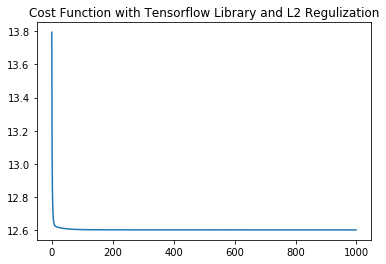

Optimized Weights: [[ -3.69474797e-08]
 [ -6.86647397e-08]
 [  5.27405284e-08]
 [ -5.17945331e-08]
 [ -3.20845608e-08]
 [  2.07119921e-08]
 [ -2.03074908e-08]
 [  3.06684598e-08]]
Training RMSE: 3.5500000000000007
Validation RMSE: 1.3749999990494406

Used Lambda:  1000


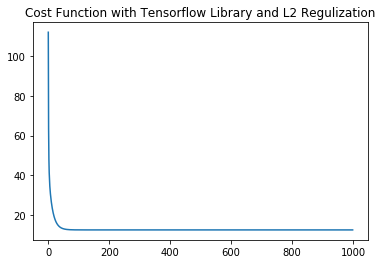

Optimized Weights: [[ -2.06297646e-08]
 [ -5.30977715e-08]
 [  2.07288355e-08]
 [ -1.74170012e-08]
 [ -1.89975093e-08]
 [  1.94560830e-08]
 [ -2.87289001e-08]
 [  3.02642427e-08]]
Training RMSE: 3.5500000000000003
Validation RMSE: 1.3749999994400077

Used Lambda:  50000


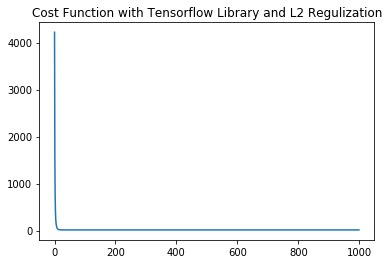

Optimized Weights: [[ -3.05175746e-10]
 [ -1.22070309e-08]
 [  3.81469700e-09]
 [  3.05175774e-10]
 [ -6.10351547e-10]
 [  4.67936179e-09]
 [ -1.02996829e-08]
 [  1.15203846e-08]]
Training RMSE: 3.55
Validation RMSE: 1.3749999998346345



In [358]:
lambdasL1 = [0.1,1000,50000]
All_weights_L1 = []
for lambd in lambdas:
    print("Used Lambda: ", lambd)
    All_weights_L1.append(Tf_Gradient_L2(X31n,X31valid,Y31train,Y31valid,lambd,0.0001,1000))
    print()

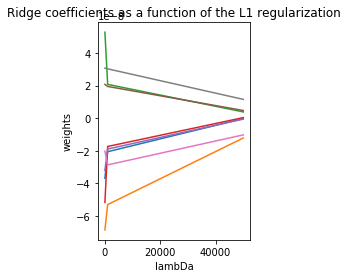

In [361]:
lambdaValL1 = np.asarray(lambdasL1)
plt.subplot(122)
ax = plt.gca()
ax.plot(lambdaValL1, All_weights_L1)
plt.xlabel('lambDa')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the L1 regularization')
plt.axis('tight')
plt.show()